# IMPORTING THE NECESSARY LIBRARIES

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from wordcloud import WordCloud

# READING THE DATA 

In [62]:
# Load your weather data into a Pandas DataFrame  # Replace with your file path
weather_data = pd.read_csv("Weather Data.csv")
# Display the first few rows of the DataFrame
print(weather_data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [7]:
weather_data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [9]:
weather_data.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


#  Visualization 

Text(0.5, 1.0, 'Distribution of Temperature')

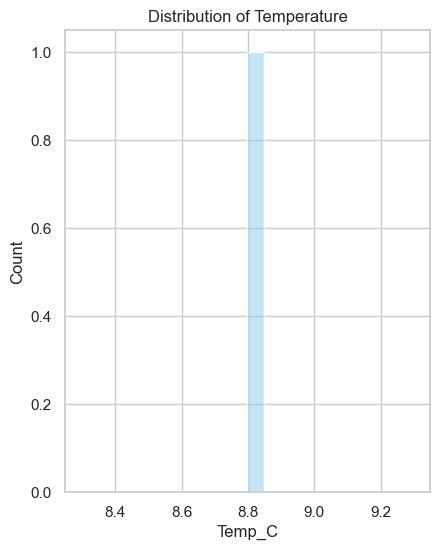

In [43]:
# Visualization - I Distribution Plots
plt.figure(figsize=(16, 6))

# Distribution of Temperature
plt.subplot(1, 3, 1)
sns.histplot(daily_data['Temp_C'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')

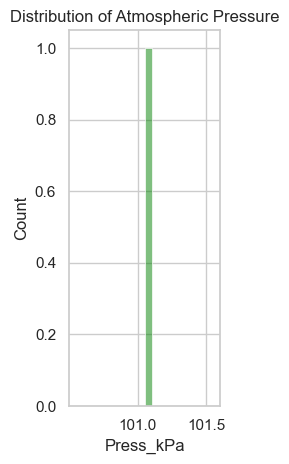

In [46]:
# Visualization - II  Distribution of Atmospheric Pressure
plt.subplot(1, 3, 3)
sns.histplot(daily_data['Press_kPa'], bins=20, kde=True, color='green')
plt.title('Distribution of Atmospheric Pressure')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Humidity')

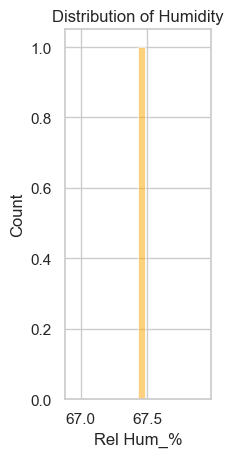

In [44]:
# Visualization - III Distribution of Humidity
plt.subplot(1, 3, 2)
sns.histplot(daily_data['Rel Hum_%'], bins=20, kde=True, color='orange')
plt.title('Distribution of Humidity')

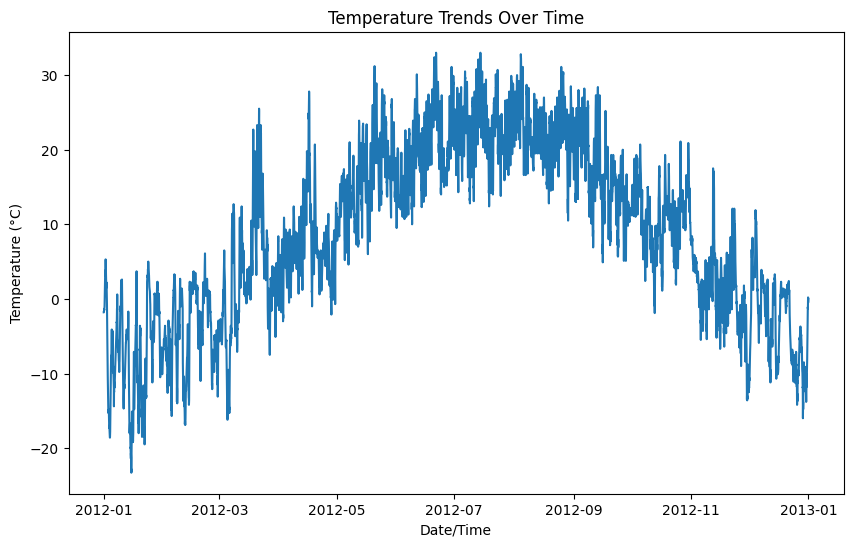

In [3]:
# Visualization - IV Convert 'Date/Time' column to datetime type
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])

# Explore the data (EDA)
# Example: Plot temperature trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=weather_data)
plt.title('Temperature Trends Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.show()


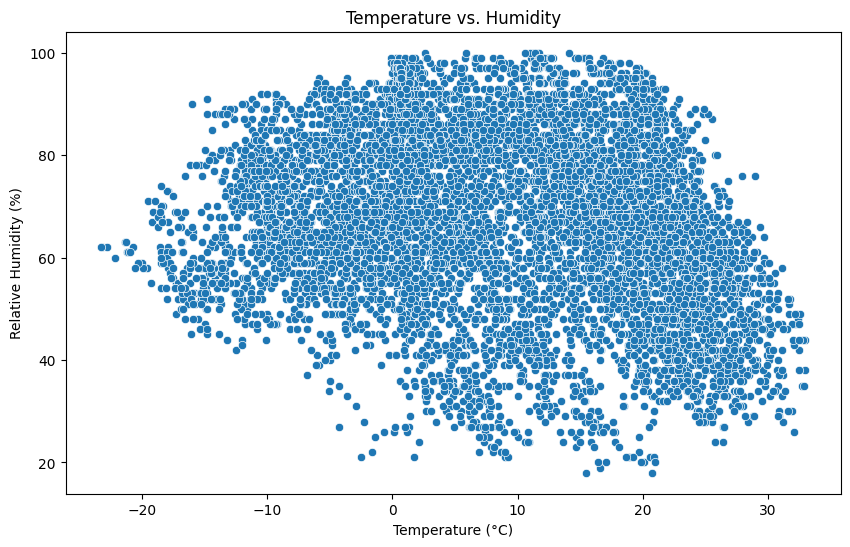

In [4]:
# Visualization - V Example: Scatter plot of Temperature vs. Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Rel Hum_%', data=weather_data)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


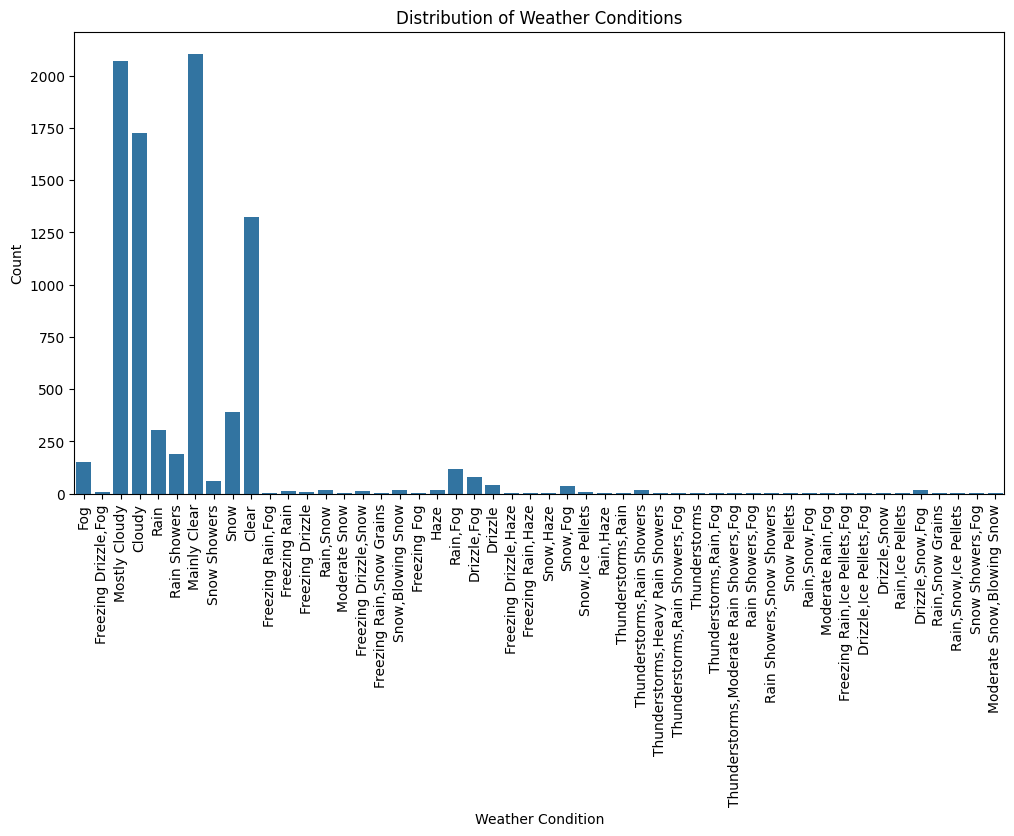

In [5]:
#  Visualization - VI Example: Count plot of Weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather', data=weather_data)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


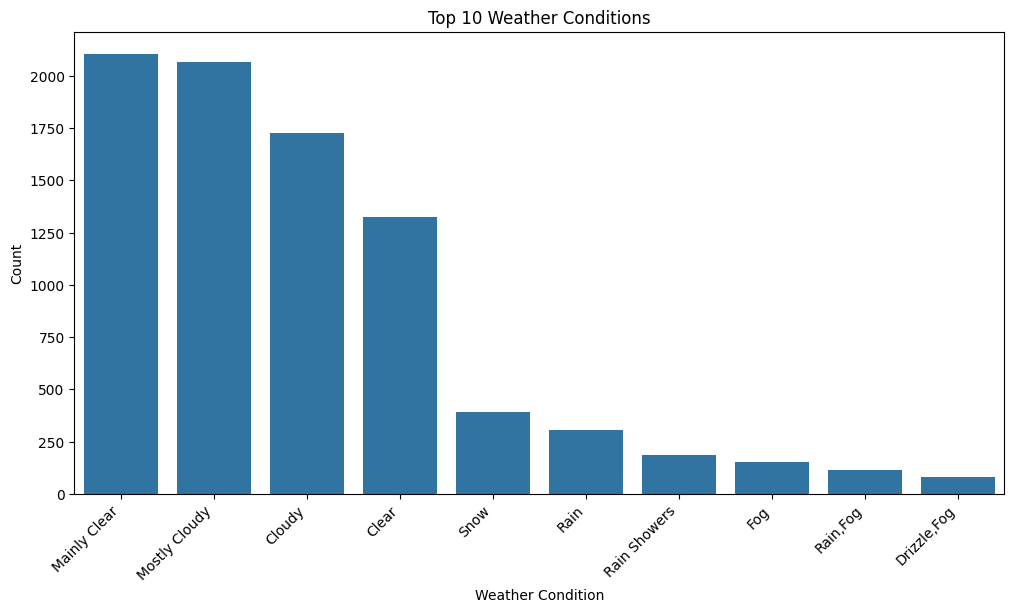

In [6]:
# Visualization - VII Example: Count plot of the top 10 most common Weather conditions
plt.figure(figsize=(12, 6))
top_10_weather_conditions = weather_data['Weather'].value_counts().head(10)
sns.barplot(x=top_10_weather_conditions.index, y=top_10_weather_conditions.values)
plt.title('Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


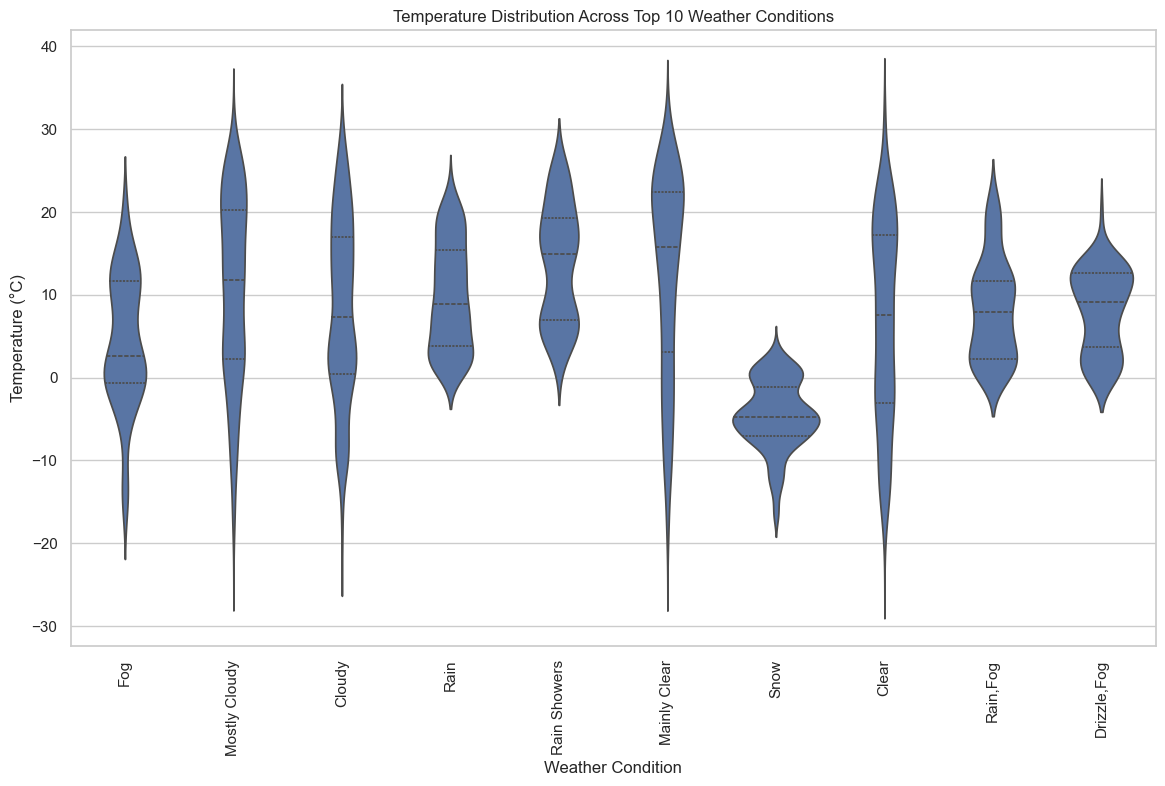

In [55]:
# Visualization - VIII Get the top 10 most frequent weather conditions
top_weather_conditions = weather_data['Weather'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 weather conditions
filtered_weather_data = weather_data[weather_data['Weather'].isin(top_weather_conditions)]

# Violin Plot - Temperature vs. Weather Conditions (Top 10)
plt.figure(figsize=(14, 8))
sns.violinplot(x='Weather', y='Temp_C', data=filtered_weather_data, inner='quartile')
plt.title('Temperature Distribution Across Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


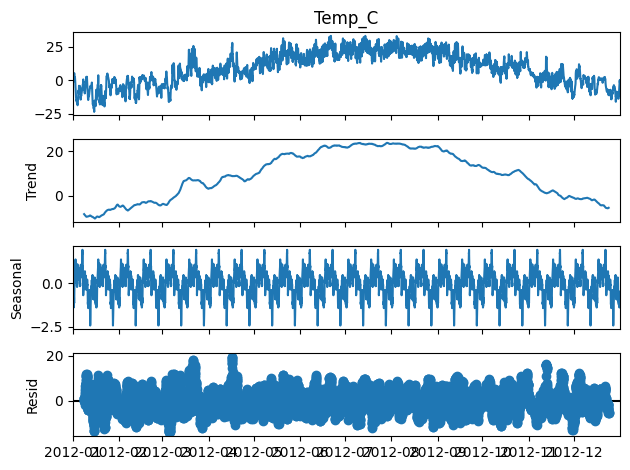

In [30]:
# Visualization - IX Example: Seasonal decomposition of temperature
decomposition = seasonal_decompose(weather_data['Temp_C'], period=365)
decomposition.plot()
plt.show()


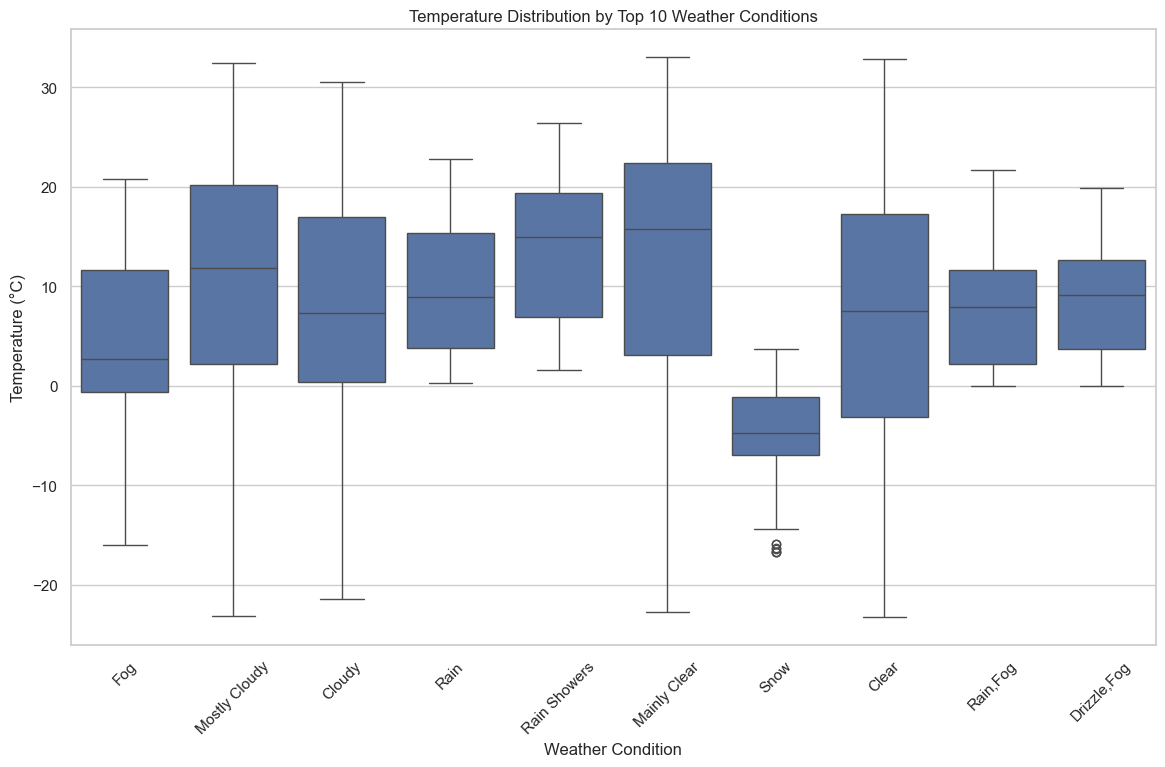

In [56]:
# Visualization - X Box Plot 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Weather', y='Temp_C', data=filtered_weather_data)
plt.title('Temperature Distribution by Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


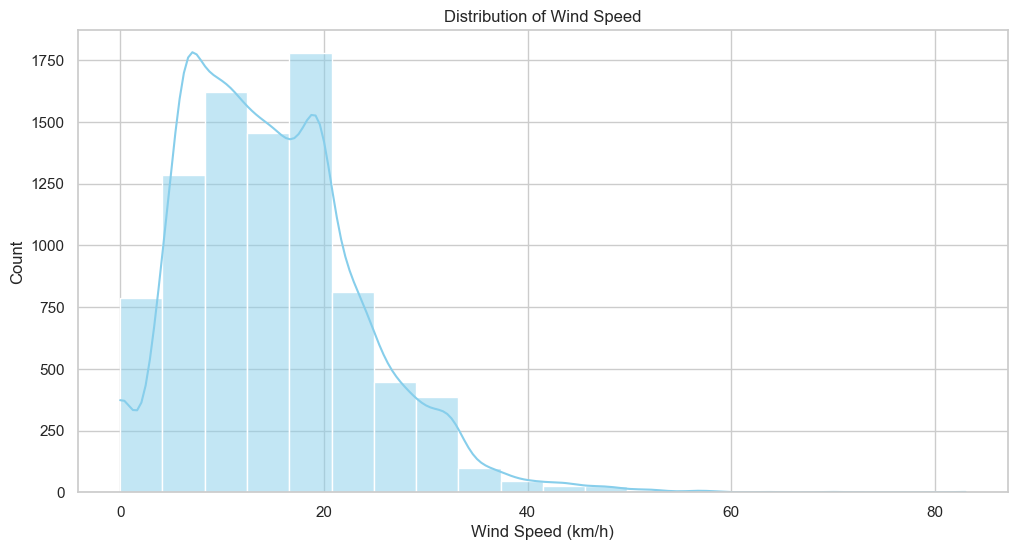

In [57]:
# Visualization - XI kernel density estimate (KDE)
plt.figure(figsize=(12, 6))
sns.histplot(weather_data['Wind Speed_km/h'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Count')
plt.show()


C:\Users\91630\AppData\Local\Temp\ipykernel_3372\3895159353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=wind_speed_bins, palette='viridis')


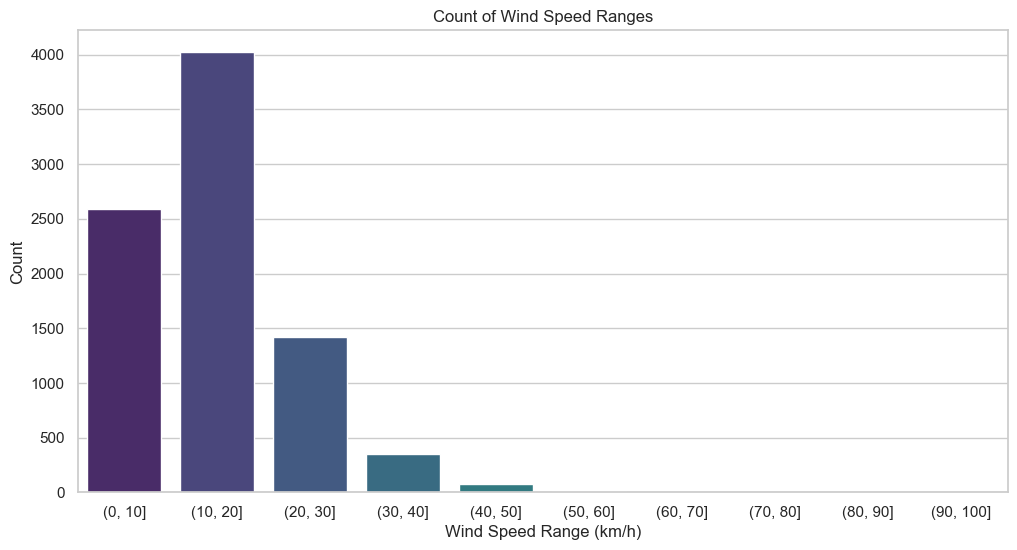

In [60]:
# Visualization - XII Bar Graphs 
plt.figure(figsize=(12, 6))
wind_speed_bins = pd.cut(weather_data['Wind Speed_km/h'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sns.countplot(x=wind_speed_bins, palette='viridis')
plt.title('Count of Wind Speed Ranges')
plt.xlabel('Wind Speed Range (km/h)')
plt.ylabel('Count')
plt.show()


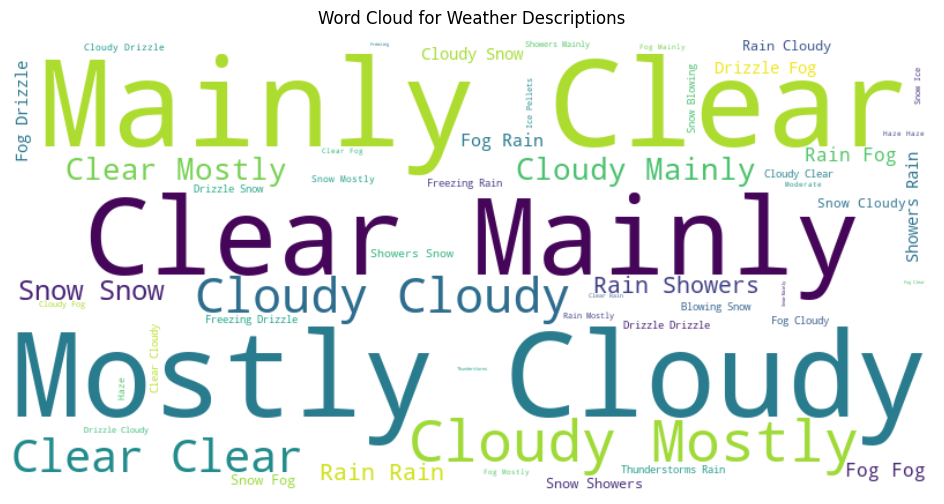

In [34]:
# Visualization - XIII  Combine all weather descriptions into a single string - Word Cloud 
text = ' '.join(weather_data['Weather'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Weather Descriptions')
plt.axis('off')  # Turn off axis labels
plt.show()


# 